In [146]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

In [147]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target: int

In [148]:
def setup_node(state:AgentState)->AgentState:
    '''this node sets the unset values of the AgentState'''
    state['target'] = 12
    state['attempts'] = 0
    return state
    

In [149]:
def guess_node(state:AgentState)->AgentState:
    next_guess = (state['lower_bound']+state['upper_bound'])//2
    state['guesses'].append(next_guess)
    state['attempts'] += 1
    return state

In [150]:
def hint_node(state:AgentState)->AgentState:
    lastGuess = state['guesses'][-1]
    if lastGuess > state['target']:
        state['upper_bound'] = lastGuess -1
    elif lastGuess < state['target']:
        state['lower_bound'] = lastGuess + 1
    return state

In [151]:
def should_continue(state:AgentState) -> AgentState:
    '''function to determine if we should continue looping'''
    if state['attempts'] < 7 and (state['target'] not in state['guesses']):
        return 'continue'
    else:
        print(f"FOUND! target is:{state["guesses"][-1]}")
        return 'exit' #exit the loop

In [152]:
graph = StateGraph(AgentState)
graph.add_node("setup",setup_node)
graph.add_node("guess",guess_node)
graph.add_node("hint_node",hint_node)
graph.add_edge("setup","guess")
graph.add_edge("guess","hint_node")

graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        'continue':"guess",
        'exit':END
    }
)
graph.set_entry_point("setup")
app = graph.compile()

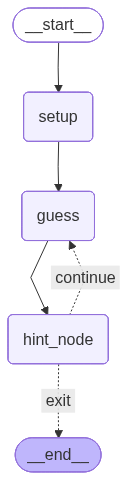

In [153]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [154]:
app.invoke({'player_name': 'Student', "guesses":[],"attempts":0, "lower_bound":1, "upper_bound":20})

FOUND! target is:12


{'player_name': 'Student',
 'guesses': [10, 15, 12],
 'attempts': 3,
 'lower_bound': 11,
 'upper_bound': 14,
 'target': 12}